In [3]:
#importing yahoofinance data set
import yfinance as yf

In [4]:
#creating instance to ticker class and represent S&P 500 index data as df
df = yf.Ticker("^GSPC")

In [5]:
#getting the historical price as the final data set
df = df.history(period = "max")

In [6]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [7]:
df.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-07-31 00:00:00-04:00', '2023-08-01 00:00:00-04:00',
               '2023-08-02 00:00:00-04:00', '2023-08-03 00:00:00-04:00',
               '2023-08-04 00:00:00-04:00', '2023-08-07 00:00:00-04:00',
               '2023-08-08 00:00:00-04:00', '2023-08-09 00:00:00-04:00',
               '2023-08-10 00:00:00-04:00', '2023-08-11 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24018, freq=None)

# Ploting the data in the index

<AxesSubplot:xlabel='Date'>

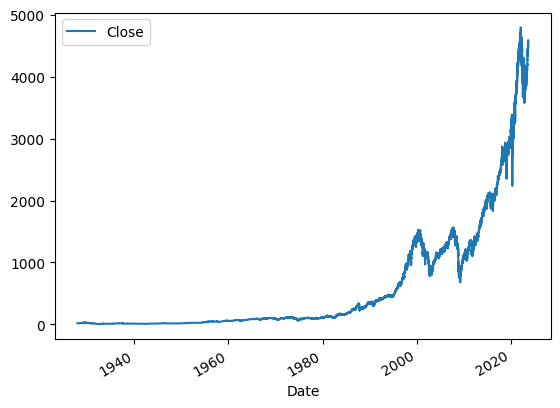

In [8]:
# ploting close as y and date and time as x
df.plot.line(y = 'Close', use_index = True)

# performing data cleaning 
### removing extra colums (dividend
s , stock splits as they are more useful for indivual stocks not for index)

In [10]:
del df["Dividends"]
del df["Stock Splits"]

In [11]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


# performing machine learning


In [13]:
df["Tomorrow"] = df['Close'].shift(-1)
df.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000


In [15]:
#setting target
df["Target"] = (df["Tomorrow"]>df["Close"]).astype(int)

### Removing data before 1990

In [21]:
df = df.loc["1990-01-01":].copy()
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-08-07 00:00:00-04:00,4491.580078,4519.839844,4491.149902,4518.439941,3493920000,4499.379883,0
2023-08-08 00:00:00-04:00,4498.029785,4503.310059,4464.390137,4499.379883,3884910000,4467.709961,0
2023-08-09 00:00:00-04:00,4501.569824,4502.439941,4461.330078,4467.709961,3803100000,4468.830078,1
